# Graph Mining analysis of Social Network

### Importations des packages

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import community as cl
import matplotlib.cm as cm

### Chargement des données

In [118]:
contact = pd.read_csv('data/Contact-diaries-network_data_2013.csv', sep=' ', names=['i', 'j', 'w'])
print(contact.head())
print(contact.shape)

infos = pd.read_table('data/metadata_2013.txt', names=['i', 'class', 'gender'])
print(infos.head())
print(infos.shape)

   i    j  w
0  3   28  2
1  3  106  1
2  3  147  4
3  3  177  1
4  3  295  4
(502, 3)
     i  class gender
0  650  2BIO1      F
1  498  2BIO1      F
2  627  2BIO1      F
3  857  2BIO1      F
4  487  2BIO1      F
(329, 3)


## Analyse descriptive

In [95]:
classes = infos['class'].unique()
genders = infos['gender'].unique()

print(classes)
print(genders)

['2BIO1' '2BIO2' '2BIO3' 'MP*1' 'MP*2' 'PSI*' 'PC' 'PC*' 'MP']
['F' 'M' 'Unknown']


([<matplotlib.patches.Wedge at 0x20a034d8>,
 [Text(1.0356431719475236, 0.370733354850184, '2BIO1'),
  Text(0.5740765839957327, 0.938315552310517, '2BIO2'),
  Text(-0.18296229382273924, 1.0846772787512062, '2BIO3'),
  Text(-0.8366170782887107, 0.7141931561669165, 'MP*1'),
  Text(-1.0927863015900503, 0.12577002447777472, 'MP*2'),
  Text(-0.9517514223439827, -0.5515153942241378, 'PSI*'),
  Text(-0.28554632463182933, -1.0622915308375824, 'PC'),
  Text(0.5650906891247772, -0.9437544771096371, 'PC*'),
  Text(1.042534099961195, -0.3508883731589029, 'MP')],
 [Text(0.56489627560774, 0.2022181935546458, '10.9%'),
  Text(0.31313268217949053, 0.5118084830784638, '10.6%'),
  Text(-0.09979761481240322, 0.5916421520461124, '12.2%'),
  Text(-0.4563365881574785, 0.38955990336377255, '10.0%'),
  Text(-0.5960652554127546, 0.06860183153333166, '8.8%'),
  Text(-0.5191371394603541, -0.3008265786677115, '11.6%'),
  Text(-0.15575254070827052, -0.5794317440932267, '13.4%'),
  Text(0.3082312849771512, -0.514775

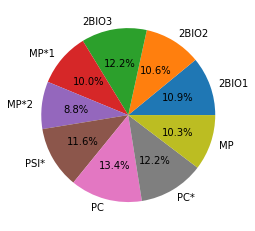

In [96]:
labels = infos['class'].unique()
values = infos.groupby('class')['i'].count()
plt.pie(values, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2669dad8>,
 [Text(0.19331124388955206, 1.0828807704386825, 'F'),
  Text(-0.2652079066501681, -1.0675508260735111, 'M'),
  Text(1.097543581258692, -0.0734716764327924, 'Unknown')],
 [Text(0.10544249666702839, 0.5906622384210994, '44.4%'),
  Text(-0.14465885817281893, -0.5823004505855515, '53.5%'),
  Text(0.5986601352320138, -0.04007545987243222, '2.1%')])

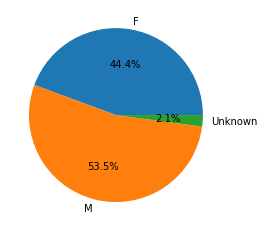

In [97]:
labels = infos.gender.unique()
values = infos.groupby('gender')['i'].count()
plt.pie(values, labels=labels, autopct='%1.1f%%')

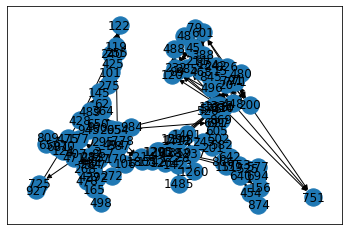

In [98]:
G = nx.from_pandas_edgelist(contact, source='i', target='j', edge_attr='w', create_using=nx.DiGraph())

nx.draw_networkx(G)

## Analyse des degrés

In [99]:
G.degree()

DiDegreeView({3: 8, 28: 13, 106: 12, 147: 6, 177: 9, 295: 9, 407: 17, 15: 16, 21: 10, 48: 7, 200: 13, 211: 10, 242: 11, 480: 7, 771: 9, 791: 9, 826: 11, 845: 16, 20: 1, 634: 8, 327: 6, 441: 13, 478: 9, 45: 8, 79: 5, 134: 7, 232: 10, 601: 6, 488: 8, 62: 2, 650: 7, 65: 7, 681: 11, 809: 7, 87: 10, 388: 11, 496: 5, 89: 9, 120: 8, 285: 11, 101: 8, 119: 8, 240: 6, 364: 12, 425: 9, 272: 8, 587: 11, 1214: 10, 122: 5, 124: 7, 471: 13, 475: 6, 970: 6, 145: 11, 400: 15, 428: 11, 489: 8, 945: 17, 151: 9, 156: 5, 502: 13, 694: 8, 753: 5, 866: 12, 1359: 7, 454: 7, 159: 8, 201: 8, 640: 8, 642: 10, 165: 5, 268: 8, 498: 3, 170: 4, 494: 10, 778: 7, 173: 3, 429: 10, 857: 8, 448: 14, 751: 3, 245: 10, 582: 8, 210: 11, 468: 12, 691: 12, 869: 8, 1237: 9, 1423: 11, 255: 3, 275: 4, 265: 6, 504: 8, 372: 10, 954: 9, 984: 7, 927: 3, 874: 2, 687: 5, 520: 4, 576: 4, 605: 11, 525: 6, 577: 5, 1805: 8, 1332: 10, 725: 3, 1401: 12, 1201: 9, 1295: 17, 1342: 7, 1594: 11, 1828: 12, 1204: 4, 1228: 8, 1485: 3, 1260: 2, 1238:

In [100]:
max(dict(G.degree()).values())

17

In [101]:
sorted(dict(G.degree()).items(), key=lambda x:x[1], reverse=True)[:5]

[(407, 17), (945, 17), (1295, 17), (15, 16), (845, 16)]

Name: 
Type: DiGraph
Number of nodes: 120
Number of edges: 502
Average in degree:   4.1833
Average out degree:   4.1833


(array([ 1.,  0.,  4.,  0.,  0.,  7.,  0.,  5.,  0.,  0.,  8.,  0.,  8.,
         0.,  0., 12.,  0., 20.,  0.,  0., 12.,  0., 11.,  0.,  0., 13.,
         0.,  7.,  0.,  0.,  5.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,
         3.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ,
         5.4,  5.8,  6.2,  6.6,  7. ,  7.4,  7.8,  8.2,  8.6,  9. ,  9.4,
         9.8, 10.2, 10.6, 11. , 11.4, 11.8, 12.2, 12.6, 13. , 13.4, 13.8,
        14.2, 14.6, 15. , 15.4, 15.8, 16.2, 16.6, 17. ]),
 <BarContainer object of 40 artists>)

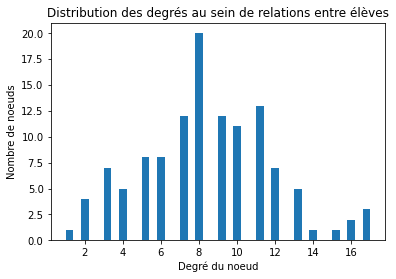

In [120]:
print(nx.info(G))
plt.title("Distribution des degrés au sein de relations entre élèves")
plt.xlabel("Degré du noeud")
plt.ylabel("Nombre de noeuds")
plt.hist(dict(G.degree()).values(), bins=40)

(array([ 3.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,
        21.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,
        11.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
         3.]),
 array([0.   , 0.225, 0.45 , 0.675, 0.9  , 1.125, 1.35 , 1.575, 1.8  ,
        2.025, 2.25 , 2.475, 2.7  , 2.925, 3.15 , 3.375, 3.6  , 3.825,
        4.05 , 4.275, 4.5  , 4.725, 4.95 , 5.175, 5.4  , 5.625, 5.85 ,
        6.075, 6.3  , 6.525, 6.75 , 6.975, 7.2  , 7.425, 7.65 , 7.875,
        8.1  , 8.325, 8.55 , 8.775, 9.   ]),
 <BarContainer object of 40 artists>)

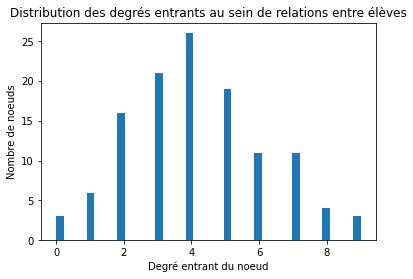

In [121]:
plt.title("Distribution des degrés entrants au sein de relations entre élèves")
plt.xlabel("Degré entrant du noeud")
plt.ylabel("Nombre de noeuds")
plt.hist(dict(G.in_degree()).values(), bins=40)

(array([ 1.,  0.,  0., 12.,  0.,  0.,  0., 19.,  0.,  0., 23.,  0.,  0.,
         0., 20.,  0.,  0.,  0., 12.,  0.,  0., 12.,  0.,  0.,  0.,  7.,
         0.,  0.,  0.,  8.,  0.,  0.,  3.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.]),
 array([ 0.   ,  0.275,  0.55 ,  0.825,  1.1  ,  1.375,  1.65 ,  1.925,
         2.2  ,  2.475,  2.75 ,  3.025,  3.3  ,  3.575,  3.85 ,  4.125,
         4.4  ,  4.675,  4.95 ,  5.225,  5.5  ,  5.775,  6.05 ,  6.325,
         6.6  ,  6.875,  7.15 ,  7.425,  7.7  ,  7.975,  8.25 ,  8.525,
         8.8  ,  9.075,  9.35 ,  9.625,  9.9  , 10.175, 10.45 , 10.725,
        11.   ]),
 <BarContainer object of 40 artists>)

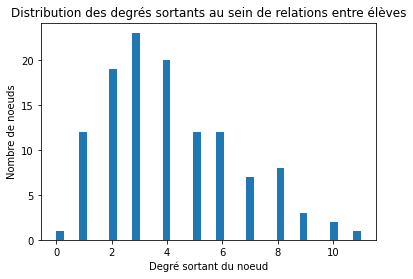

In [122]:
plt.title("Distribution des degrés sortants au sein de relations entre élèves")
plt.xlabel("Degré sortant du noeud")
plt.ylabel("Nombre de noeuds")
plt.hist(dict(G.out_degree()).values(), bins=40)

In [105]:
deg_cent = dict(G.in_degree())
print({k:deg_cent[k] for k in deg_cent if deg_cent[k] == max(deg_cent.values())})
print('--- Top 5 ---')
sorted(dict(G.in_degree()).items(), key=lambda x:x[1], reverse=True)[:5]

{106: 9, 407: 9, 1295: 9}
--- Top 5 ---


[(106, 9), (407, 9), (1295, 9), (28, 8), (1214, 8)]

In [106]:
deg_cent = dict(G.out_degree())
print({k:deg_cent[k] for k in deg_cent if deg_cent[k] == max(deg_cent.values())})
print('--- Top 5 ---')
sorted(dict(G.out_degree()).items(), key=lambda x:x[1], reverse=True)[:5]

{448: 11}
--- Top 5 ---


[(448, 11), (15, 10), (845, 10), (471, 9), (945, 9)]

## Centrality measures

### Page Rank

In [107]:
page_rank = dict(nx.pagerank(G, weight='w'))
print({k:page_rank[k] for k in page_rank if page_rank[k] == max(page_rank.values())})
print('--- Top 5 ---')
sorted(page_rank.items(), key=lambda x: x[1], reverse=True)[:5]

{454: 0.02213690006993}
--- Top 5 ---


[(454, 0.02213690006993),
 (691, 0.020155440404046397),
 (1295, 0.01910575001550231),
 (681, 0.017493688617618387),
 (106, 0.016636174721109315)]

### Closeness

In [108]:
close = dict(nx.closeness_centrality(G))
print({k:close[k] for k in close if close[k] == max(close.values())})
print('--- Top 5 ---')
sorted(close.items(), key=lambda x: x[1], reverse=True)[:5]

{691: 0.2243564092303588}
--- Top 5 ---


[(691, 0.2243564092303588),
 (245, 0.2037398743281096),
 (1332, 0.20300831284039647),
 (582, 0.1949579831932773),
 (869, 0.19462242728416668)]

### Betweenness

In [109]:
between = dict(nx.betweenness_centrality(G, weight='w'))
print({k:between[k] for k in between if between[k] == max(between.values())})
print('--- Top 5 ---')
sorted(between.items(), key=lambda x: x[1], reverse=True)[:5]

{1295: 0.2915378863409771}
--- Top 5 ---


[(1295, 0.2915378863409771),
 (106, 0.2809579764109033),
 (245, 0.2383058308068991),
 (587, 0.22379290699330576),
 (1423, 0.21695288284805447)]

### Degree

In [110]:
degree_cent = nx.degree_centrality(G)
print({k:degree_cent[k] for k in degree_cent if degree_cent[k] == max(degree_cent.values())})
print('--- Top 5 ---')
sorted(dict(degree_cent).items(), key=lambda x: x[1], reverse=True)[:5]

{407: 0.14285714285714285, 945: 0.14285714285714285, 1295: 0.14285714285714285}
--- Top 5 ---


[(407, 0.14285714285714285),
 (945, 0.14285714285714285),
 (1295, 0.14285714285714285),
 (15, 0.13445378151260504),
 (845, 0.13445378151260504)]

## Link Prediction

In [111]:
prediction = nx.jaccard_coefficient(G.to_undirected())
prediction_dict = {}
for u,v,p in prediction:
    prediction_dict[(u,v)] = p

sorted(dict(prediction_dict).items(), key=lambda x:x[1], reverse=True)[:10]

[((1594, 1412), 0.6666666666666666),
 ((327, 441), 0.625),
 ((694, 753), 0.6),
 ((265, 778), 0.5),
 ((778, 272), 0.5),
 ((1345, 1412), 0.45454545454545453),
 ((587, 170), 0.42857142857142855),
 ((173, 504), 0.42857142857142855),
 ((857, 984), 0.42857142857142855),
 ((28, 429), 0.4166666666666667)]

In [112]:
pred = nx.preferential_attachment(G.to_undirected())
pred_dict = {}

for u,v,p in pred:
    pred_dict[(u,v)] = p

sorted(dict(pred_dict).items(), key=lambda x:x[1], reverse=True)[:10]

[((407, 448), 144),
 ((1295, 407), 132),
 ((1295, 448), 132),
 ((845, 407), 132),
 ((1295, 845), 121),
 ((15, 407), 120),
 ((15, 448), 120),
 ((28, 448), 120),
 ((945, 448), 120),
 ((15, 1295), 110)]

## Clustering Coefficient

In [113]:
cluster_coeff = nx.clustering(G)
print(cluster_coeff)
{k:cluster_coeff[k] for k in cluster_coeff if cluster_coeff[k] == max(cluster_coeff.values())}

{3: 0.38461538461538464, 28: 0.24666666666666667, 106: 0.2222222222222222, 147: 0.6153846153846154, 177: 0.45588235294117646, 295: 0.19117647058823528, 407: 0.18702290076335878, 15: 0.34649122807017546, 21: 0.6071428571428571, 48: 0.15789473684210525, 200: 0.39864864864864863, 211: 0.36904761904761907, 242: 0.3173076923076923, 480: 0.6578947368421053, 771: 0.6363636363636364, 791: 0.5, 826: 0.46153846153846156, 845: 0.26956521739130435, 20: 0, 634: 0.56, 327: 0.42857142857142855, 441: 0.3493150684931507, 478: 0.5151515151515151, 45: 0.21153846153846154, 79: 0.5, 134: 0.4473684210526316, 232: 0.4523809523809524, 601: 0.23333333333333334, 488: 0.2222222222222222, 62: 0.5, 650: 0.07894736842105263, 65: 0.4473684210526316, 681: 0.46, 809: 0.4473684210526316, 87: 0.25, 388: 0.2641509433962264, 496: 0.4, 89: 0.5, 120: 0.5769230769230769, 285: 0.43137254901960786, 101: 0.5833333333333334, 119: 0.4, 240: 0.6153846153846154, 364: 0.18548387096774194, 425: 0.5, 272: 0.23076923076923078, 587: 0.3

{489: 1.0, 520: 1.0, 576: 1.0, 1485: 1.0, 1238: 1.0}

## Graph analysis

{3: Text(-0.42371677317256706, 0.15604977920822385, '3'),
 28: Text(-0.4642572885830483, 0.13502190787940588, '28'),
 106: Text(-0.24553162429647749, 0.21274540539526918, '106'),
 147: Text(-0.4340085317464494, 0.24214622068166528, '147'),
 177: Text(-0.571263270016045, 0.10535586669732888, '177'),
 295: Text(-0.39355956547882065, 0.0761388000290497, '295'),
 407: Text(-0.5375232593646259, 0.18189787724065412, '407'),
 15: Text(0.8260652907295682, -0.20474497559980656, '15'),
 21: Text(0.7854997592762406, -0.26642947852065624, '21'),
 48: Text(0.8188556294370355, 0.017709612436141595, '48'),
 200: Text(0.785563483419245, -0.17729120497742823, '200'),
 211: Text(0.8349973646164998, -0.1397833068198435, '211'),
 242: Text(0.7294837901147758, -0.14760212431254116, '242'),
 480: Text(0.7510722916316516, -0.32655246840398994, '480'),
 771: Text(0.8250937846583207, -0.29739648924541956, '771'),
 791: Text(0.7178603658188963, -0.25179530079103113, '791'),
 826: Text(0.7327107923844195, -0.200

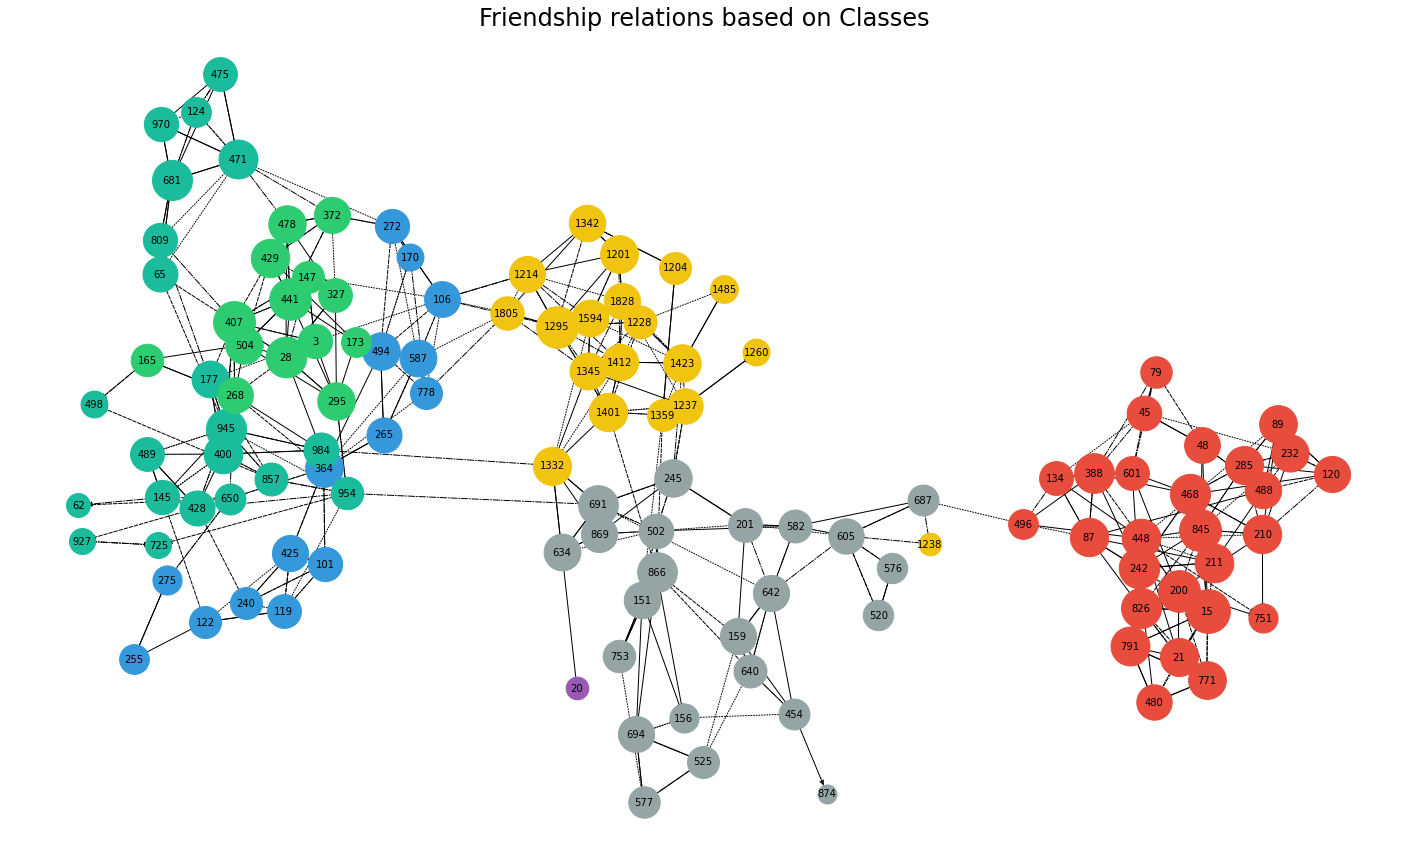

In [114]:
plt.figure(figsize=(25,15))
plt.axis('off')
plt.title('Friendship relations based on Classes', fontsize=24)

weighted_degrees = dict(nx.degree(G, weight='w'))
max_degree = max(weighted_degrees.values())

pos = nx.layout.kamada_kawai_layout(G)
colors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#f1c40f', '#e67e22', '#e74c3c', '#ecf0f1', '#95a5a6']
styles = ['dotted', 'dashdot', 'dashed', 'solid']

for node in G.nodes():
    # node = id of i
    class_i = infos.loc[infos['i'] == node, 'class']
    class_list = classes.tolist()
    color = colors[class_list.index(class_i.item())]
    size = 256 * weighted_degrees[node] ** 0.5
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=size)

for e in G.edges(data = True):
    style = styles[int(e[2]['w']) - 1]
    nx.draw_networkx_edges(G, pos, edgelist=[e], style=style)

nx.draw_networkx_labels(G, pos, font_size=10)

{3: Text(-0.5864539727864266, -0.9385953554007095, '3'),
 28: Text(0.872212441641205, -0.005430974191555454, '28'),
 106: Text(0.40437976529045083, 0.6808420536777171, '106'),
 147: Text(-0.9375014034036896, 0.25864379310171914, '147'),
 177: Text(-0.9660883436646507, -0.09544859761813156, '177'),
 295: Text(-0.8658242755472922, 0.2892669201414662, '295'),
 407: Text(0.773088350983739, -0.8006142772765054, '407'),
 15: Text(-0.8253703480558116, 0.5063863879500996, '15'),
 21: Text(-0.23113307435173952, -0.933711677548638, '21'),
 48: Text(-0.7014807080028737, -0.8208298825377467, '48'),
 200: Text(0.2531283934347644, 0.9679731989361449, '200'),
 211: Text(0.4785610368841537, -0.6833000482888503, '211'),
 242: Text(-0.8385841701931249, -0.593180525815277, '242'),
 480: Text(-0.5089684760047487, 0.919167057821086, '480'),
 771: Text(0.8927095122831056, -0.5474179942061796, '771'),
 791: Text(0.5008876779345005, 0.9017187519786969, '791'),
 826: Text(0.7418010560460195, -0.484432110099214

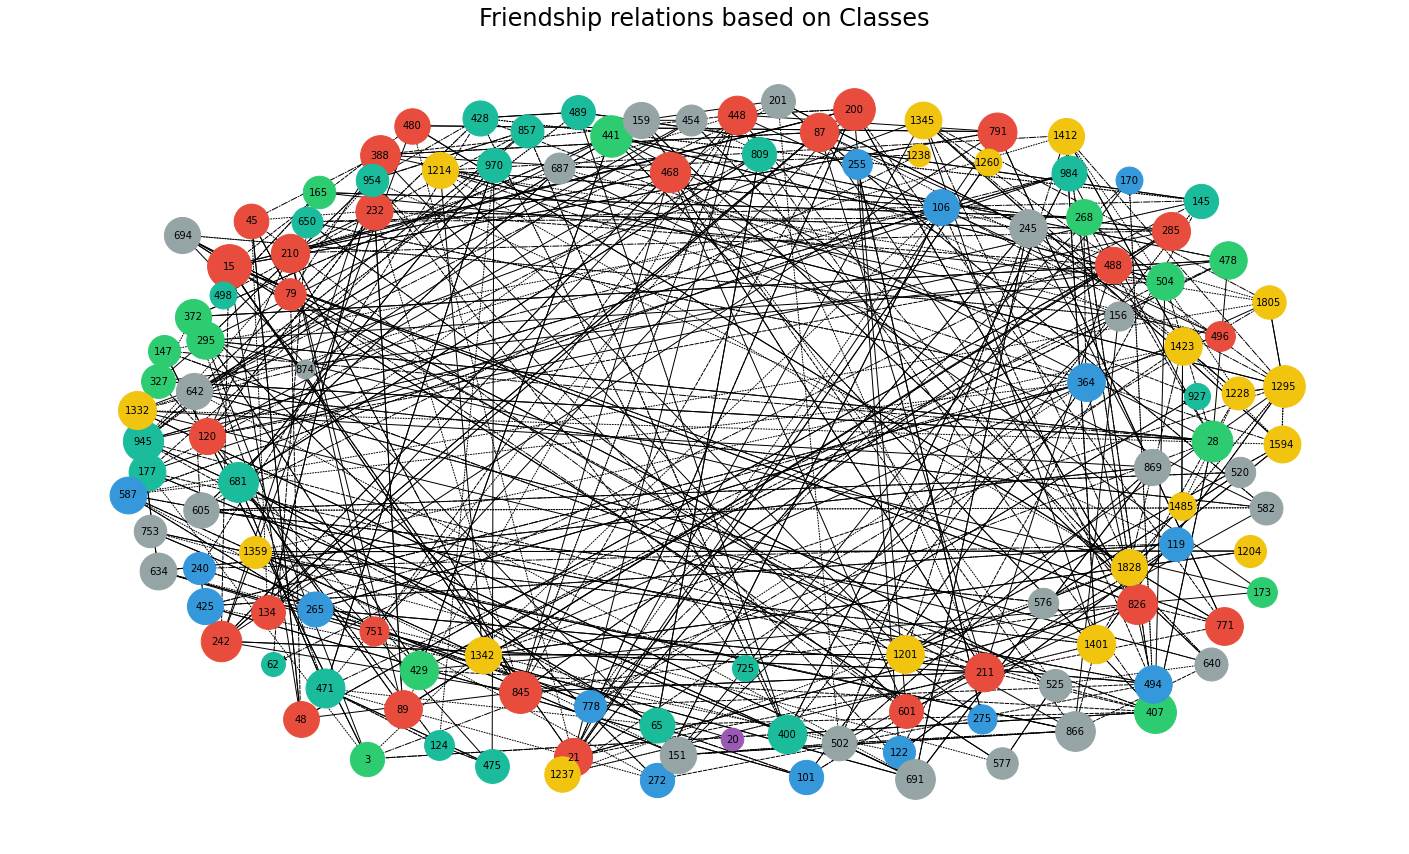

In [115]:
plt.figure(figsize=(25,15))
plt.axis('off')
plt.title('Friendship relations based on Classes', fontsize=24)

weighted_degrees = dict(nx.degree(G, weight='w'))
max_degree = max(weighted_degrees.values())

pos = nx.spring_layout(G, weight='w_', iterations=20, k=4)
colors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#f1c40f', '#e67e22', '#e74c3c', '#ecf0f1', '#95a5a6']
styles = ['dotted', 'dashdot', 'dashed', 'solid']

for node in G.nodes():
    # node = id of i
    class_i = infos.loc[infos['i'] == node, 'class']
    class_list = classes.tolist()
    color = colors[class_list.index(class_i.item())]
    size = 256 * weighted_degrees[node] ** 0.5
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=size)

for e in G.edges(data = True):
    style = styles[int(e[2]['w']) - 1]
    nx.draw_networkx_edges(G, pos, edgelist=[e], style=style)

nx.draw_networkx_labels(G, pos, font_size=10)

{3: Text(-0.42371677317256706, 0.15604977920822385, '3'),
 28: Text(-0.4642572885830483, 0.13502190787940588, '28'),
 106: Text(-0.24553162429647749, 0.21274540539526918, '106'),
 147: Text(-0.4340085317464494, 0.24214622068166528, '147'),
 177: Text(-0.571263270016045, 0.10535586669732888, '177'),
 295: Text(-0.39355956547882065, 0.0761388000290497, '295'),
 407: Text(-0.5375232593646259, 0.18189787724065412, '407'),
 15: Text(0.8260652907295682, -0.20474497559980656, '15'),
 21: Text(0.7854997592762406, -0.26642947852065624, '21'),
 48: Text(0.8188556294370355, 0.017709612436141595, '48'),
 200: Text(0.785563483419245, -0.17729120497742823, '200'),
 211: Text(0.8349973646164998, -0.1397833068198435, '211'),
 242: Text(0.7294837901147758, -0.14760212431254116, '242'),
 480: Text(0.7510722916316516, -0.32655246840398994, '480'),
 771: Text(0.8250937846583207, -0.29739648924541956, '771'),
 791: Text(0.7178603658188963, -0.25179530079103113, '791'),
 826: Text(0.7327107923844195, -0.200

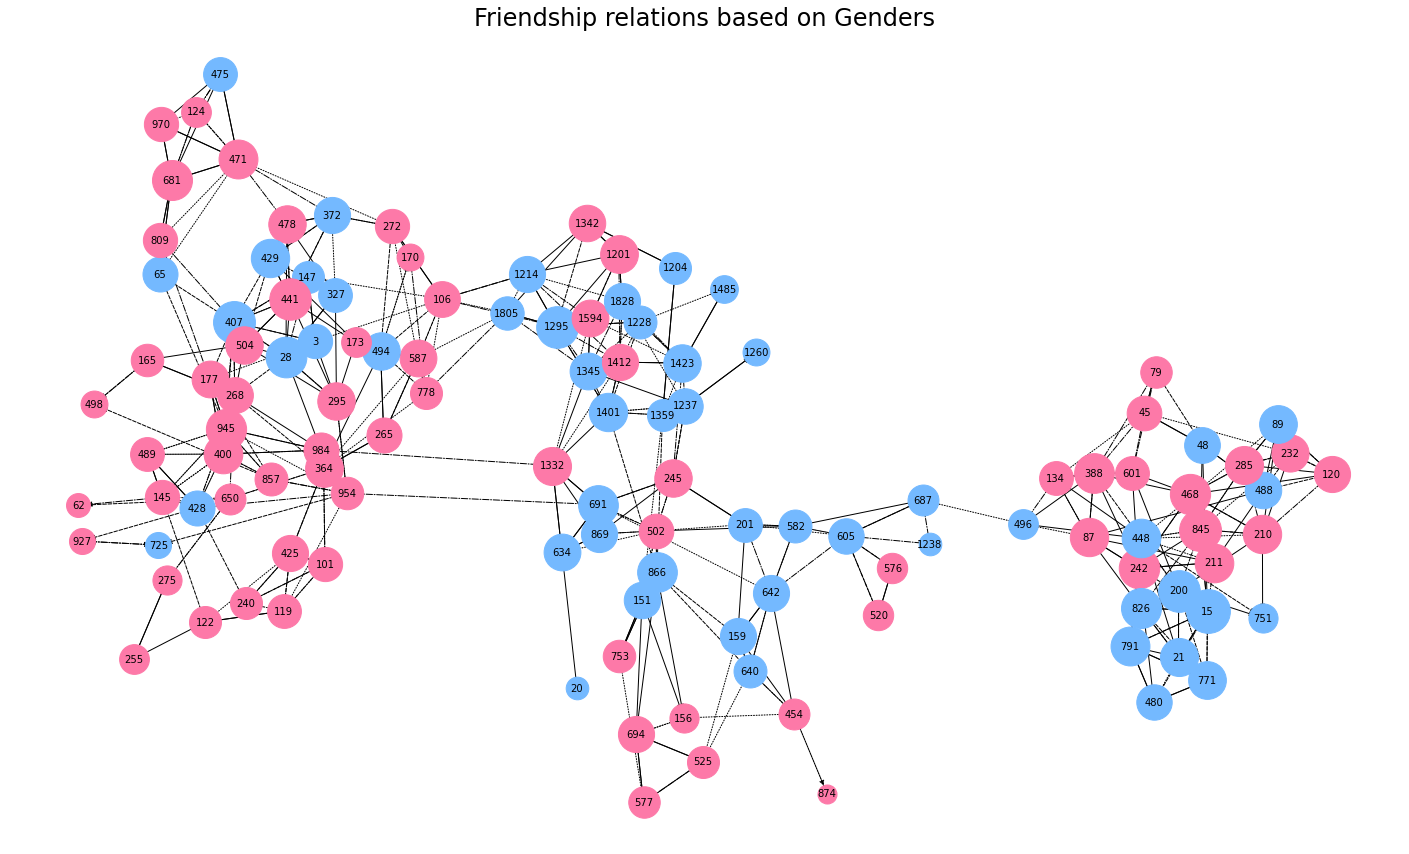

In [116]:
plt.figure(figsize=(25,15))
plt.axis('off')
plt.title('Friendship relations based on Genders', fontsize=24)

weighted_degrees = dict(nx.degree(G, weight='w'))
max_degree = max(weighted_degrees.values())

pos = nx.layout.kamada_kawai_layout(G)
colors = ['#fd79a8', '#74b9ff', '#b2bec3']
styles = ['dotted', 'dashdot', 'dashed', 'solid']

for node in G.nodes():
    # node = id of i
    gender_i = infos.loc[infos['i'] == node, 'gender']
    gender_list = genders.tolist()
    color = colors[gender_list.index(gender_i.item())]
    size = 256 * weighted_degrees[node] ** 0.5
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=size)

for e in G.edges(data = True):
    style = styles[int(e[2]['w']) - 1]
    nx.draw_networkx_edges(G, pos, edgelist=[e], style=style)

nx.draw_networkx_labels(G, pos, font_size=10)

### Méthode de Louvain

{3: Text(-0.42371677317256706, 0.15604977920822385, '3'),
 28: Text(-0.4642572885830483, 0.13502190787940588, '28'),
 106: Text(-0.24553162429647749, 0.21274540539526918, '106'),
 147: Text(-0.4340085317464494, 0.24214622068166528, '147'),
 177: Text(-0.571263270016045, 0.10535586669732888, '177'),
 295: Text(-0.39355956547882065, 0.0761388000290497, '295'),
 407: Text(-0.5375232593646259, 0.18189787724065412, '407'),
 15: Text(0.8260652907295682, -0.20474497559980656, '15'),
 21: Text(0.7854997592762406, -0.26642947852065624, '21'),
 48: Text(0.8188556294370355, 0.017709612436141595, '48'),
 200: Text(0.785563483419245, -0.17729120497742823, '200'),
 211: Text(0.8349973646164998, -0.1397833068198435, '211'),
 242: Text(0.7294837901147758, -0.14760212431254116, '242'),
 480: Text(0.7510722916316516, -0.32655246840398994, '480'),
 771: Text(0.8250937846583207, -0.29739648924541956, '771'),
 791: Text(0.7178603658188963, -0.25179530079103113, '791'),
 826: Text(0.7327107923844195, -0.200

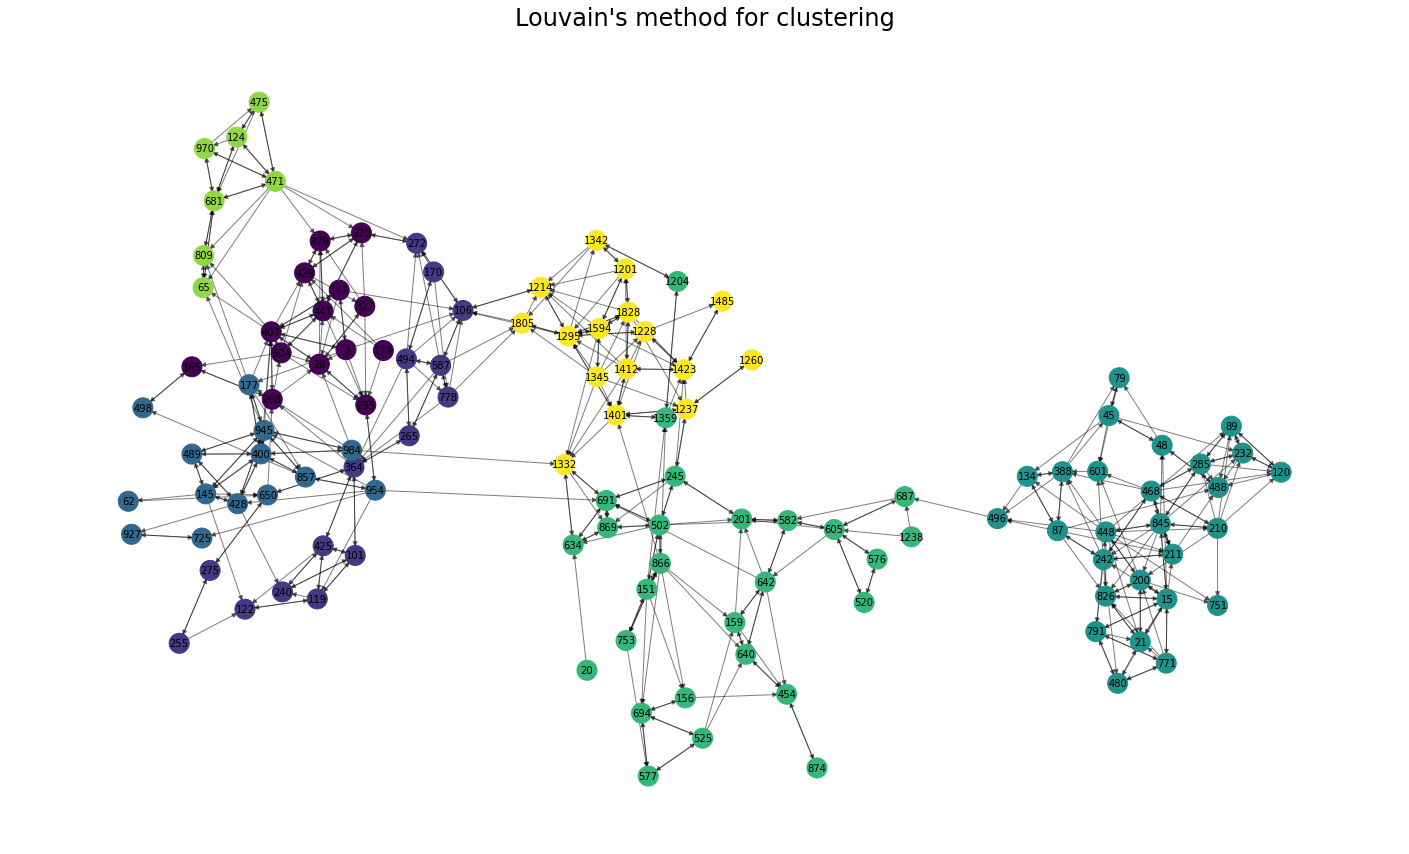

In [117]:
plt.figure(figsize=(25,15))
plt.axis('off')
plt.title('Louvain\'s method for clustering', fontsize=24)
partition = cl.best_partition(G.to_undirected())
pos = nx.layout.kamada_kawai_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=400, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)